In [2]:
import matplotlib.pyplot as plt
from synutility.SynIO.data_type import load_from_pickle
import pandas as pd 

In [13]:
import seaborn as sns

def plot_clusters_with_avg_size(clusters: dict, invariant_name, algorithm_name, time_taken):
    import matplotlib.pyplot as plt
    import pandas as pd

    # Extract group and cluster names
    group_names = set()
    cluster_names = set()

    for cluster_name in clusters.keys():
        group_name = cluster_name.split('_cluster_')[0]
        group_names.add(group_name)
        cluster_names.add(cluster_name)

    # Calculate the sizes of each cluster
    cluster_sizes = [len(cluster) for cluster in clusters.values()]

    # Find the minimum, maximum, and average size of the clusters
    min_size = min(cluster_sizes)
    max_size = max(cluster_sizes)

    # Calculate average cluster size per group
    group_cluster_sizes = {group: [] for group in group_names}
    for cluster_name, cluster in clusters.items():
        group_name = cluster_name.split('_cluster_')[0]
        group_cluster_sizes[group_name].append(len(cluster))

    average_cluster_size_per_group = {group: sum(sizes) / len(sizes) for group, sizes in group_cluster_sizes.items()}

    # Create a dataframe for plotting
    group_cluster_counts = {group: 0 for group in group_names}
    for cluster_name in clusters.keys():
        group_name = cluster_name.split('_cluster_')[0]
        group_cluster_counts[group_name] += 1

    df_plot = pd.DataFrame({
        'Group': list(group_cluster_counts.keys()),
        'Cluster Count': list(group_cluster_counts.values()),
        'Min Size': [min_size] * len(group_cluster_counts),
        'Max Size': [max_size] * len(group_cluster_counts),
        'Average Size': [average_cluster_size_per_group[group] for group in group_cluster_counts.keys()]
    })

    # Order the dataframe by Group
    df_plot = df_plot.sort_values('Cluster Count', ascending=False)

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Create a second y-axis for the average cluster size
    ax2 = ax1.twinx()
    sns.lineplot(x='Group', y='Average Size', data=df_plot, ax=ax2, color='r', marker='o')
    ax2.set_ylabel('Average Cluster Size', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Annotate each point on the line with its value
    for line in ax2.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            ax2.annotate(f'{y:.2f}', xy=(x, y), xytext=(5, 5), textcoords='offset points', color='r')

    # Bar plot for cluster counts with pastel colors
    sns.barplot(x='Group', y='Cluster Count', data=df_plot, ax=ax1, palette='flare', hue='Cluster Count')
    ax1.set_ylabel(f'# Clusters - Algorithm: {algorithm_name}', color='black')
    ax1.set_xlabel(f'Groups - Invariant: {invariant_name}', color='black')
    ax1.tick_params(axis='y', labelcolor='black')

    group_numbers = [str(i) for i in range(len(df_plot))]
    ax1.set_xticks(range(len(group_numbers)))  # Explicitly set tick positions
    ax1.set_xticklabels(group_numbers)        # Set tick labels

    # Move the legend to the right of the plot
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Overlay box for 3 number summary on the right 
    row = df_plot.iloc[0]
    # Overlay box for 3-number summary
    # Adjust the figure to create space for the overlays on the right
    fig.subplots_adjust(right=0.9)  # Leave 25% of the figure for overlays

    # Define overlay content
    summary_text = (
        f"Min cluster size: {row['Min Size']}\n"
        f"Max cluster size: {row['Max Size']}\n"
        f"Average cluster size: {row['Average Size']:.2f}"
    )
    time_text = f"Time taken: {time_taken:.2f}s"

    # Add the summary text without a box
    fig.text(
        0.97, 0.6,  # x, y position in figure coordinates
        summary_text,
        ha='left', va='top', fontsize=10
    )

    # Add the time annotation without a box
    fig.text(
        0.97, 0.5,  # x, y position in figure coordinates
        time_text,
        ha='left', va='top', fontsize=10
    )

    plt.title(f'Invariant:{invariant_name} - Algorithm:{algorithm_name}')
    plt.show()


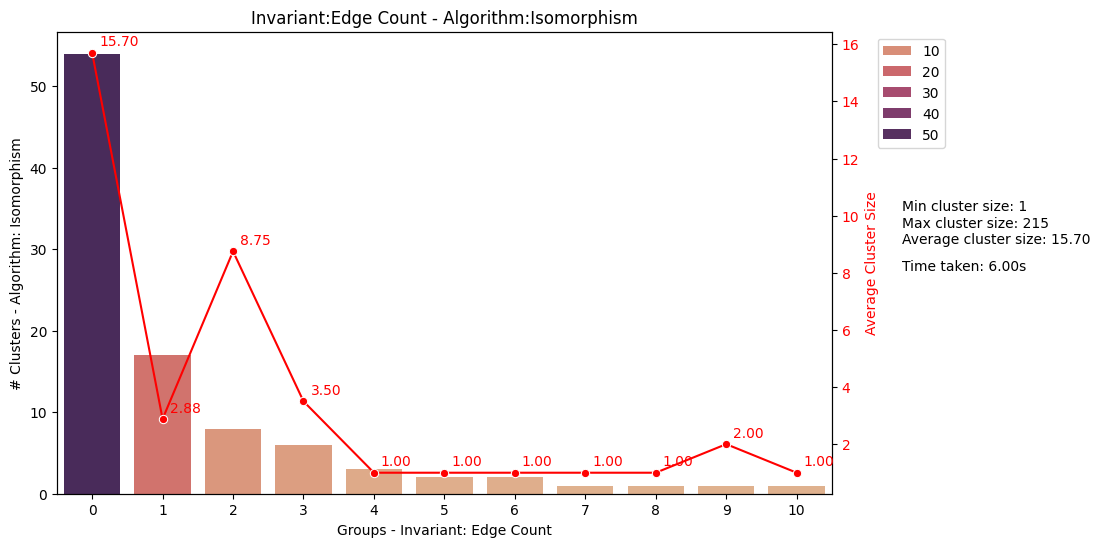

In [14]:
cluster_test = load_from_pickle('data/results/edge_count_isomorphism_test_results.pkl.gz')
plot_clusters_with_avg_size(cluster_test['clusters'], 'Edge Count', 'Isomorphism', cluster_test['time'])

In [15]:
import os

def load_all_results():
    results_folder = 'data/results/'
    all_results = {}

    for file_name in os.listdir(results_folder):
        if file_name.endswith('.pkl.gz'):
            file_path = os.path.join(results_folder, file_name)
            result = load_from_pickle(file_path)
            all_results[file_name] = result

    return all_results

In [16]:
all_results = load_all_results()
print(all_results.keys())

dict_keys(['vertex_degree_weisfeiler_lehmann_si_results.pkl.gz', 'none_weisfeiler_lehmann_si_results.pkl.gz', 'rank_weisfeiler_lehmann_si_results.pkl.gz', 'vertex_count_weisfeiler_lehmann_nx_results.pkl.gz', 'edge_count_none_results.pkl.gz', 'vertex_degree_isomorphism_test_results.pkl.gz', 'vertex_degree_none_results.pkl.gz', 'vertex_count_none_results.pkl.gz', 'edge_count_isomorphism_test_results.pkl.gz', 'edge_count_weisfeiler_lehmann_si_results.pkl.gz', 'vertex_count_weisfeiler_lehmann_si_results.pkl.gz', 'rank_weisfeiler_lehmann_nx_results.pkl.gz', 'rank_none_results.pkl.gz', 'none_weisfeiler_lehmann_nx_results.pkl.gz', 'vertex_degree_weisfeiler_lehmann_nx_results.pkl.gz', 'rank_isomorphism_test_results.pkl.gz', 'none_isomorphism_test_results.pkl.gz', 'edge_count_weisfeiler_lehmann_nx_results.pkl.gz', 'vertex_count_isomorphism_test_results.pkl.gz'])


In [17]:
def plot_all_results(result_dict):
    for result_name, result in result_dict.items():
        clusters = result['clusters']
        invariant_name = result['configuration'].invariant
        algorithm_name = result['configuration'].algorithm
        time_taken = result['time']

        print(invariant_name, algorithm_name, time_taken)
        if invariant_name != "none":
            plot_clusters_with_avg_size(clusters, invariant_name, algorithm_name, time_taken)

vertex_degree weisfeiler_lehmann_si 25.651097804000003


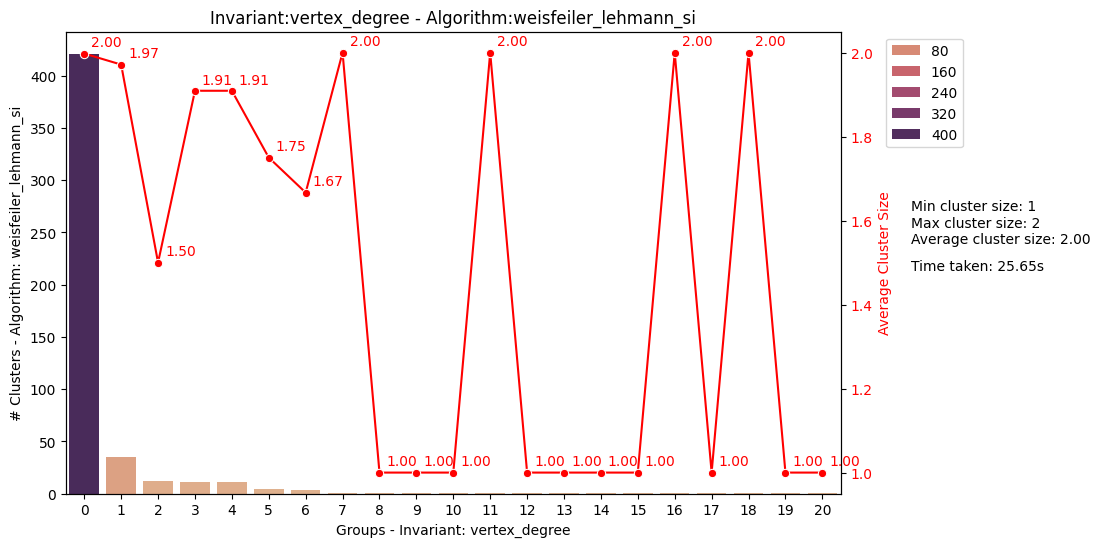

none weisfeiler_lehmann_si 28.789966208000003
rank weisfeiler_lehmann_si 27.360875177000004


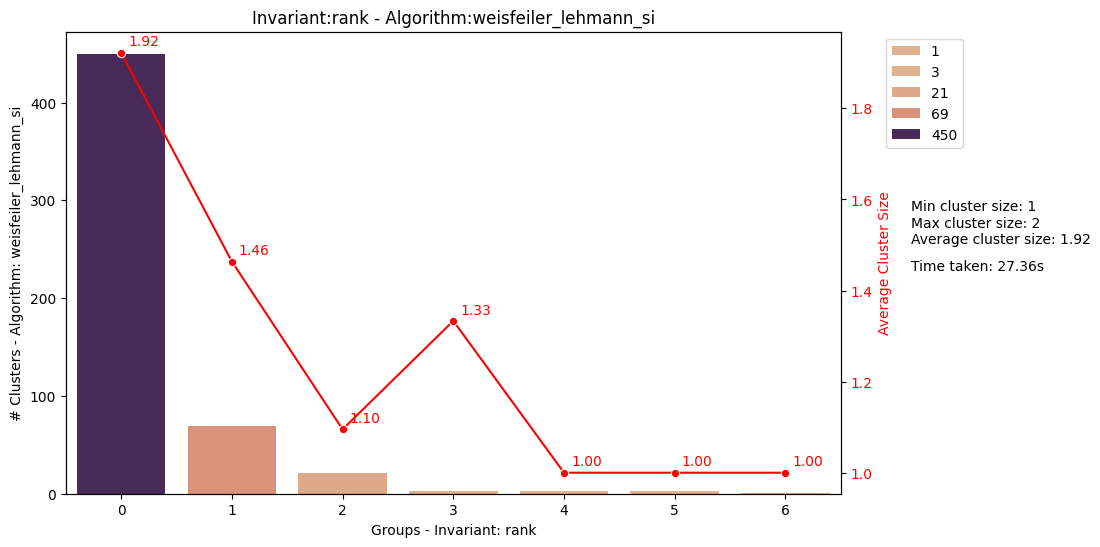

vertex_count weisfeiler_lehmann_nx 0.182602451


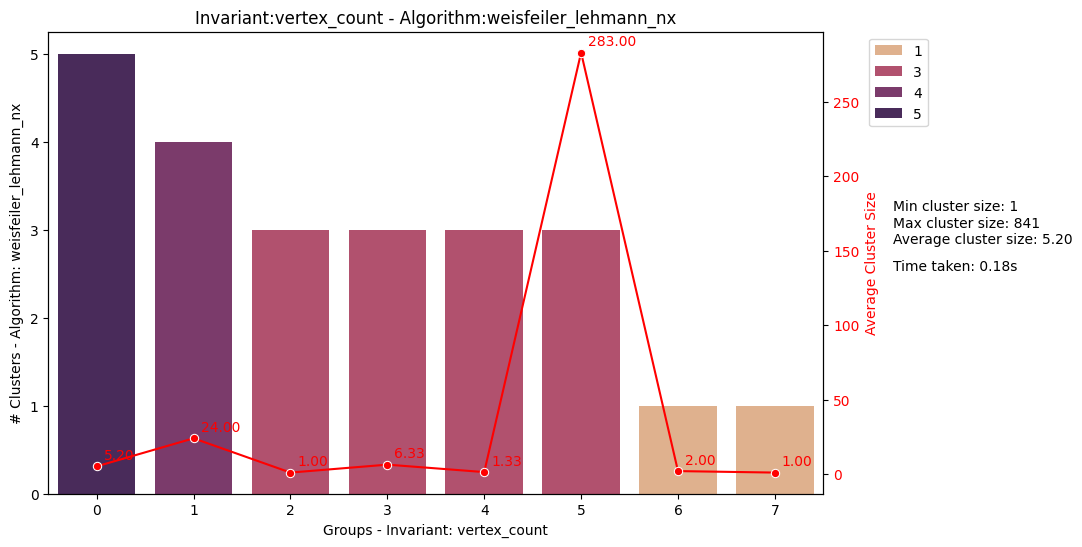

edge_count none 0.042918381000000005


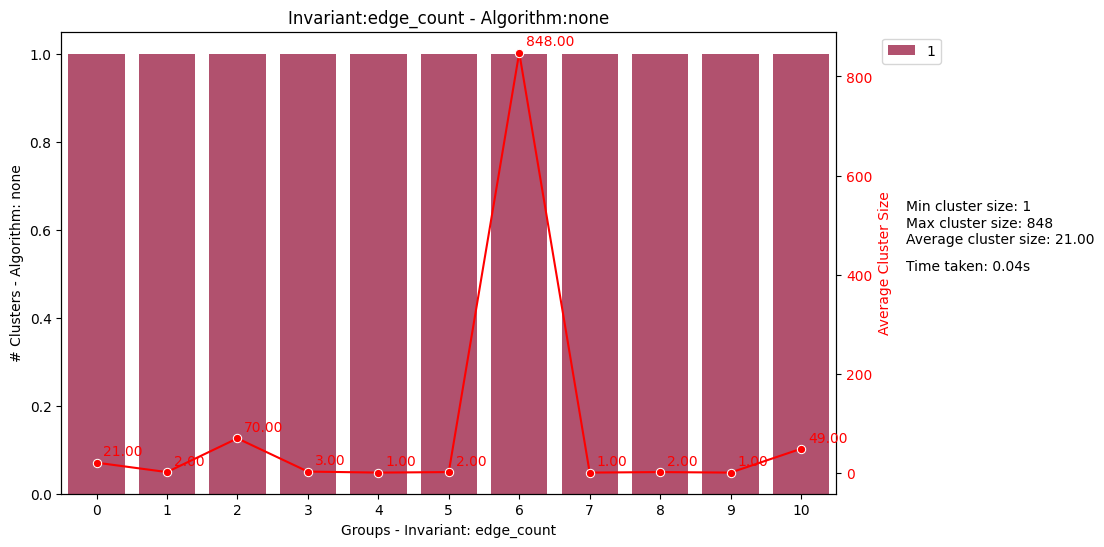

vertex_degree isomorphism_test 6.009650814000002


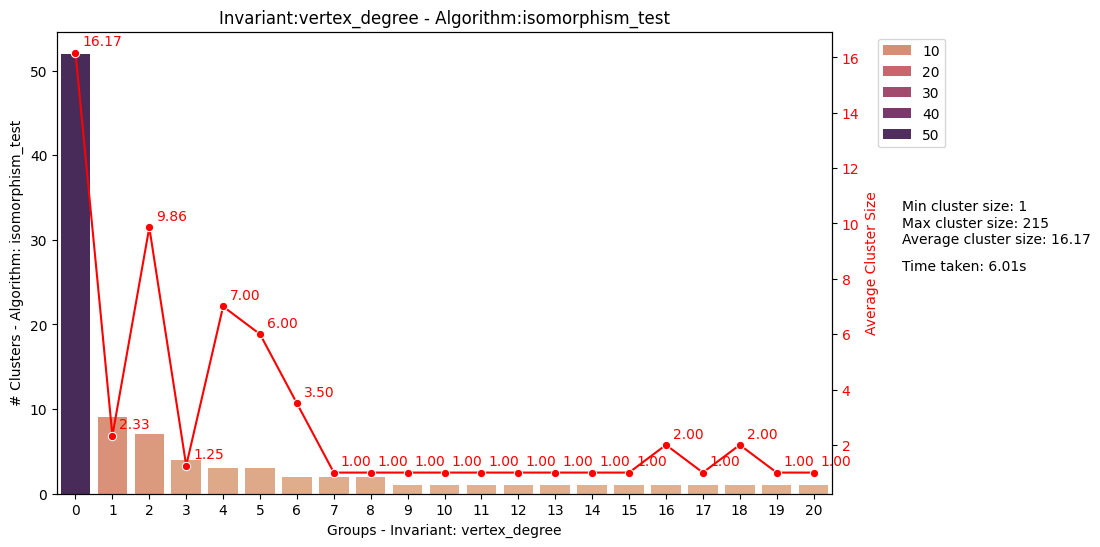

vertex_degree none 0.031986236


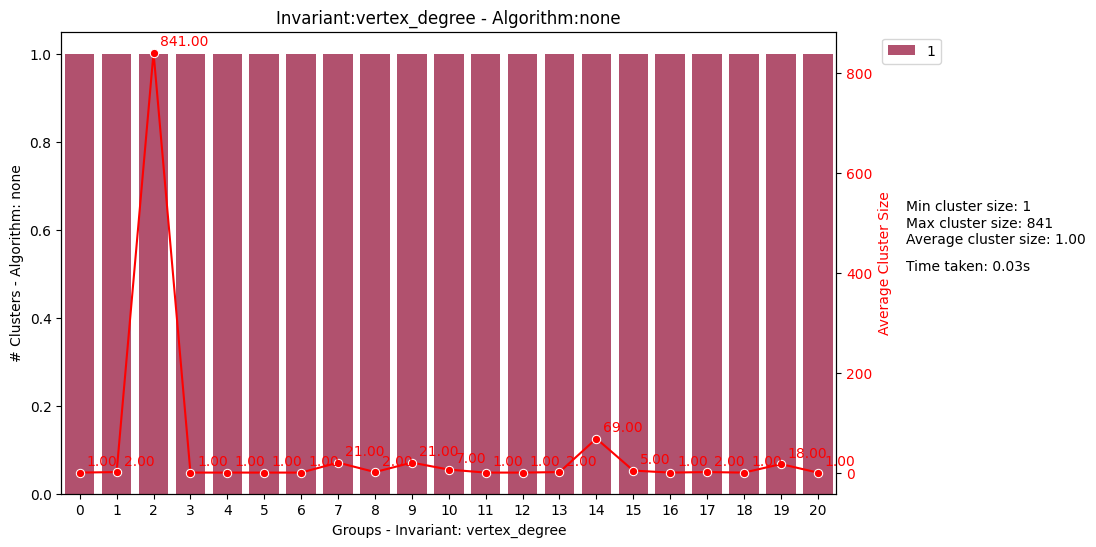

vertex_count none 0.005543439000000001


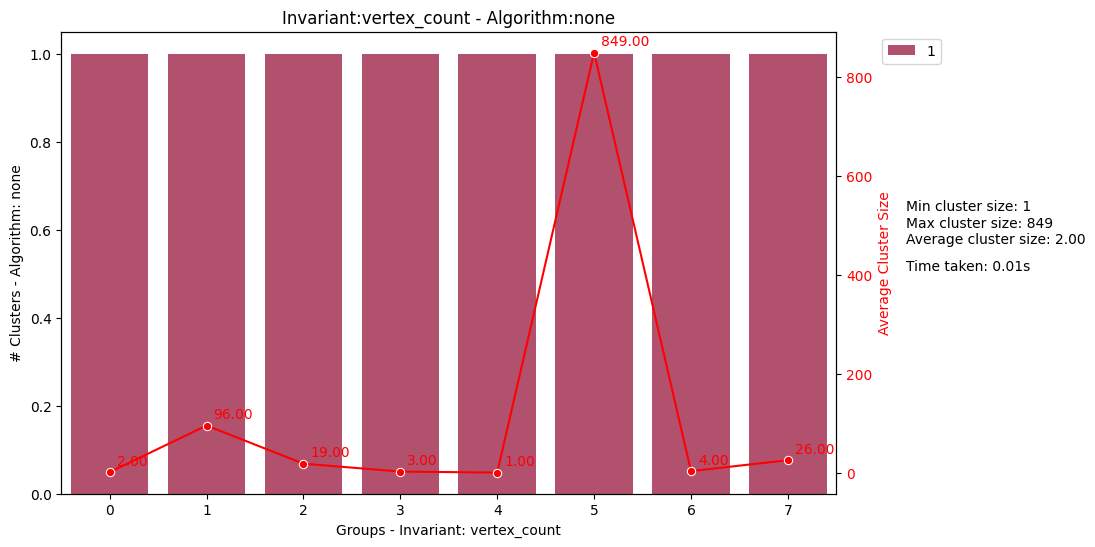

edge_count isomorphism_test 5.995767130000002


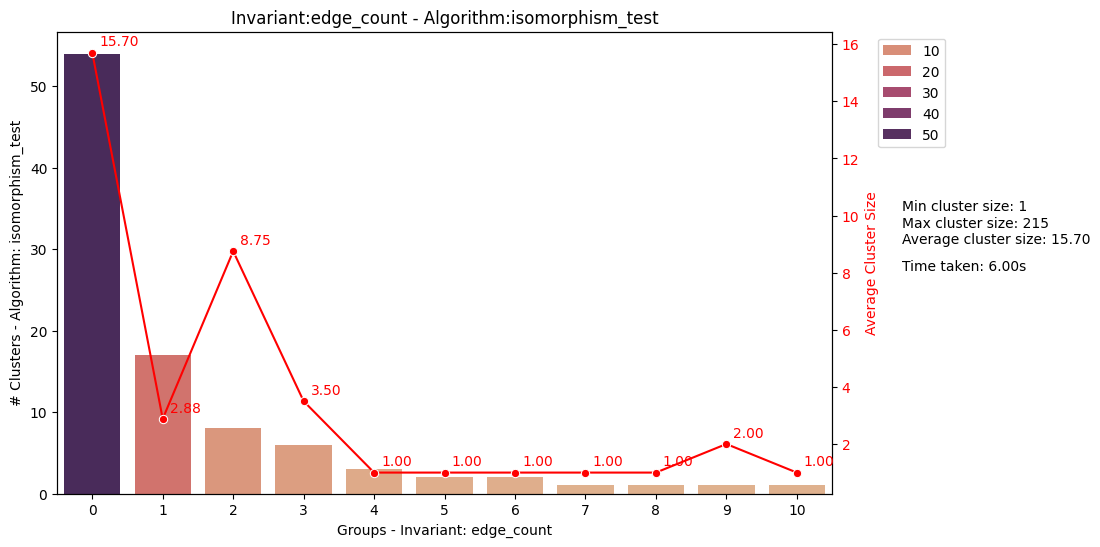

edge_count weisfeiler_lehmann_si 24.962533969999996


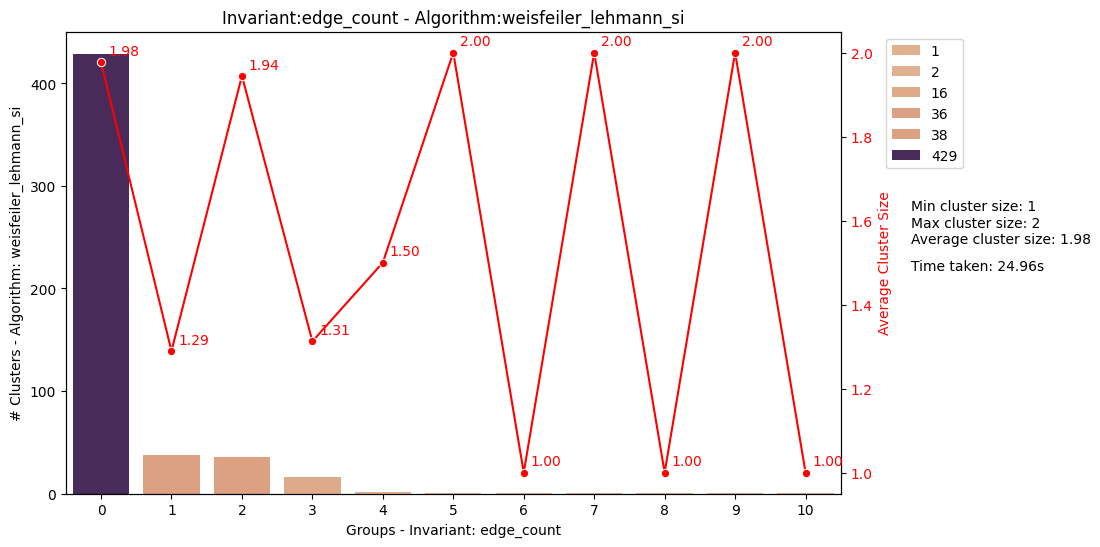

vertex_count weisfeiler_lehmann_si 26.333064512


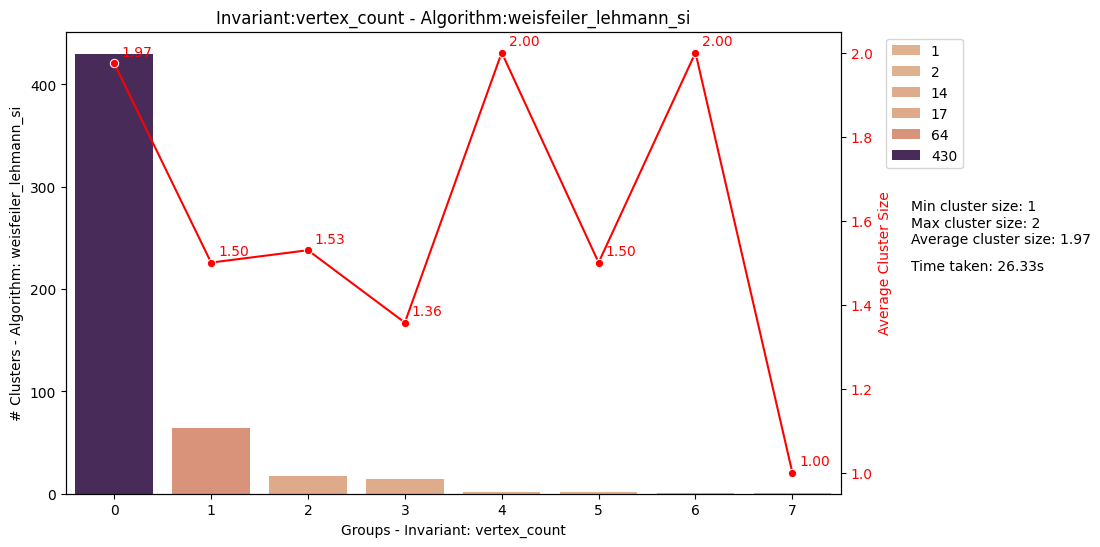

rank weisfeiler_lehmann_nx 0.6086253250000001


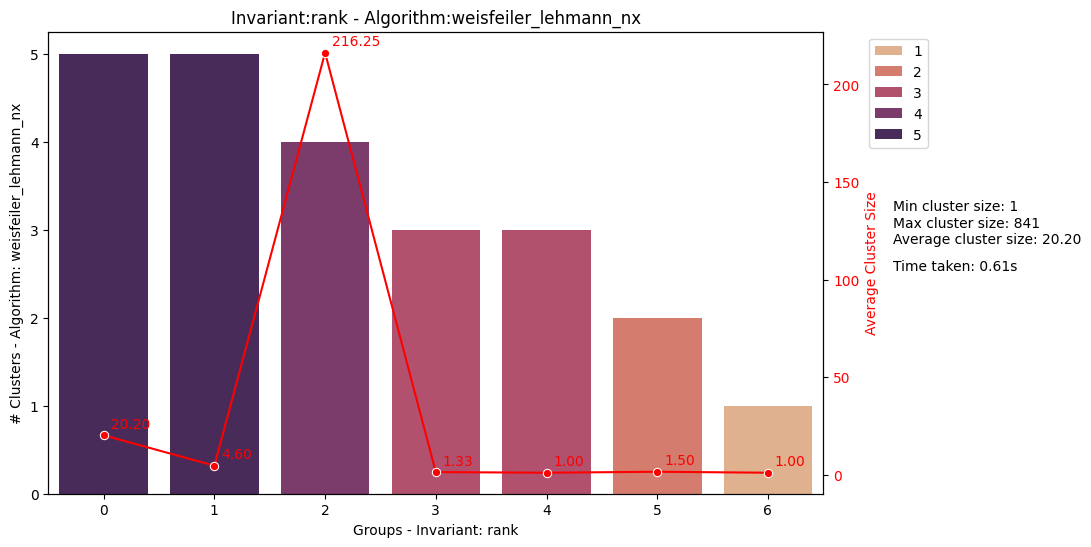

rank none 0.454409911


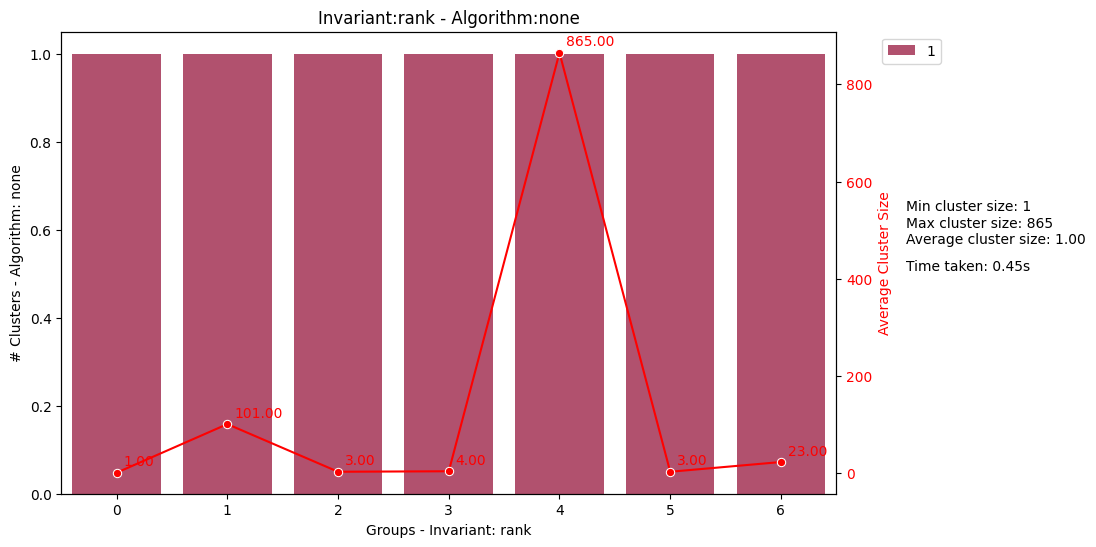

none weisfeiler_lehmann_nx 0.17076215099999997
vertex_degree weisfeiler_lehmann_nx 0.21086403500000003


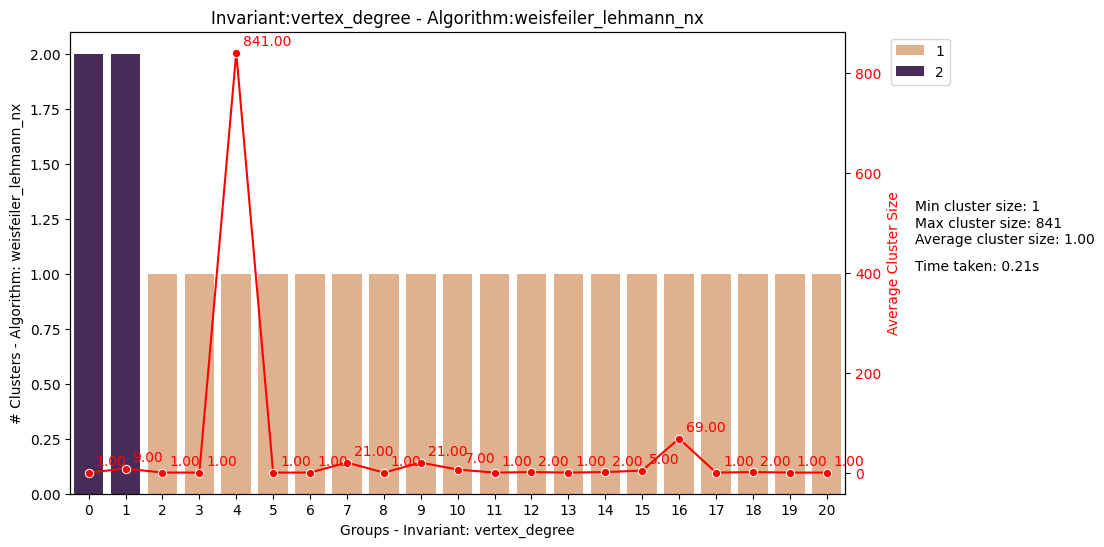

rank isomorphism_test 6.50353914


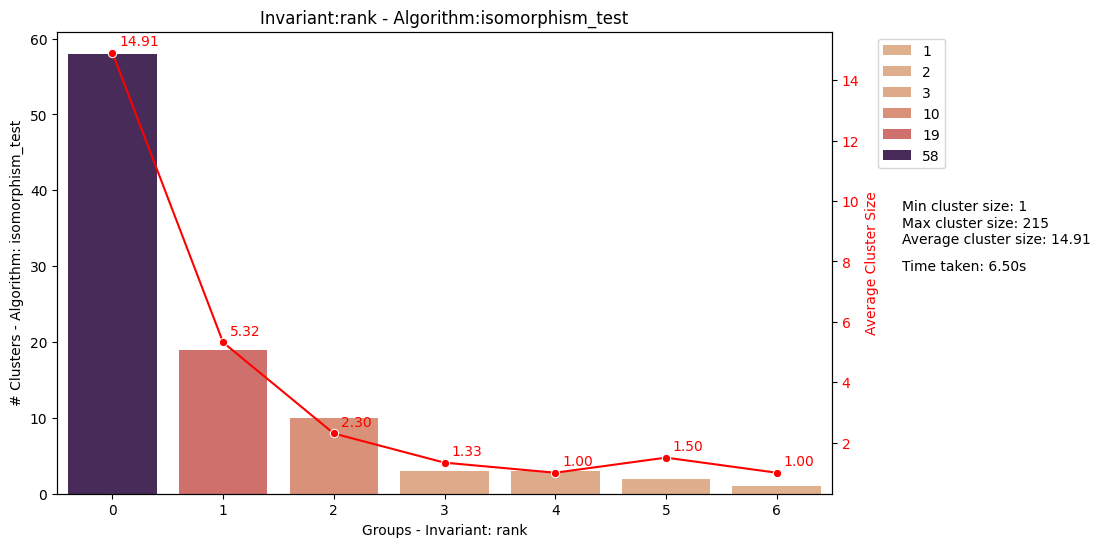

none isomorphism_test 6.026111047999999
edge_count weisfeiler_lehmann_nx 0.23871933500000003


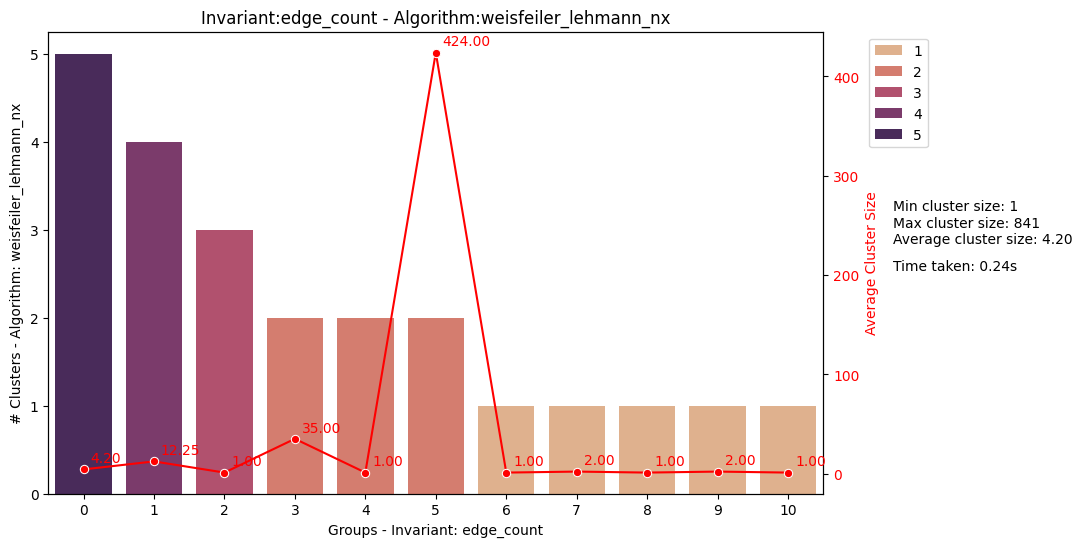

vertex_count isomorphism_test 6.195997071999999


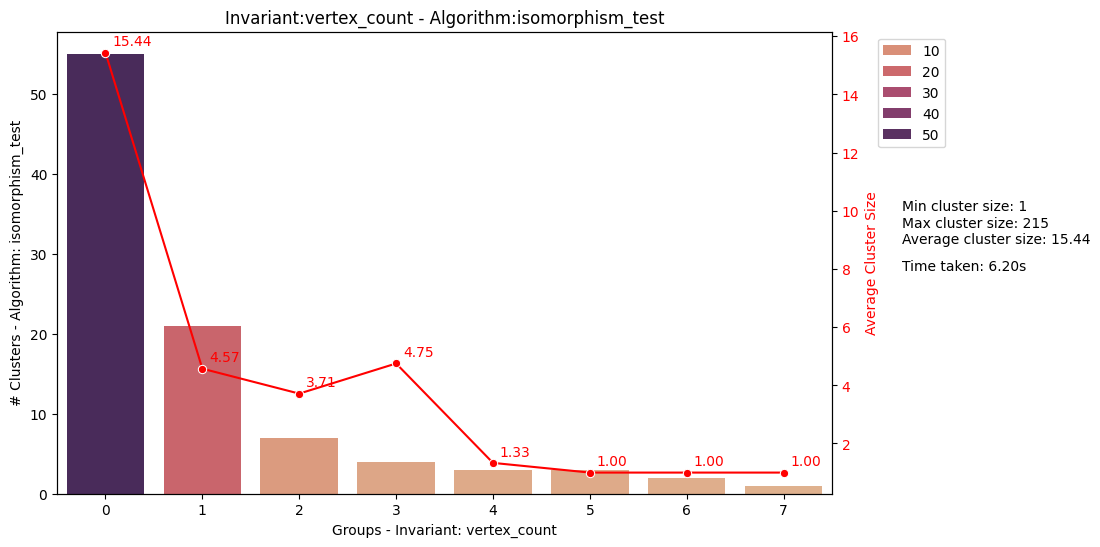

In [18]:
plot_all_results(all_results)